<a href="https://colab.research.google.com/github/AlphardXyl/Algorithms-of-Foundation-Models/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Use the keras module to import the necessary data
(train_X, train_y), (test_X, test_y) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_X = train_X/255
test_X = test_X/255

X1 = train_X[1:2]
X1.shape

(1, 28, 28)

In [ ]:
# This cell should be run inplace of the cell directly above
print(f"np.shape(train_X) ={np.shape(train_X)}")
print(f"np.shape(test_X) = {np.shape(test_X)} \n")

print(f"np.shape(train_X[0]) = {np.shape(train_X[0])}")
print(f"np.shape(test_X[0]) = {np.shape(test_X[0])} \n")

print(f"train_X[0] = {train_X[0]}")

np.shape(train_X) =(60000, 28, 28)
np.shape(test_X) = (10000, 28, 28) 

np.shape(train_X[0]) = (28, 28)
np.shape(test_X[0]) = (28, 28) 

train_X[0] = [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0

train_y[1] = 0 



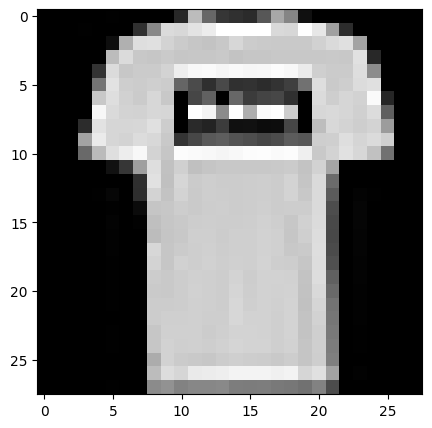

In [ ]:
print(f"{train_y[1] = } \n")
plt.figure(figsize=(6, 5))
plt.imshow(train_X[1], cmap="gray")
plt.show()

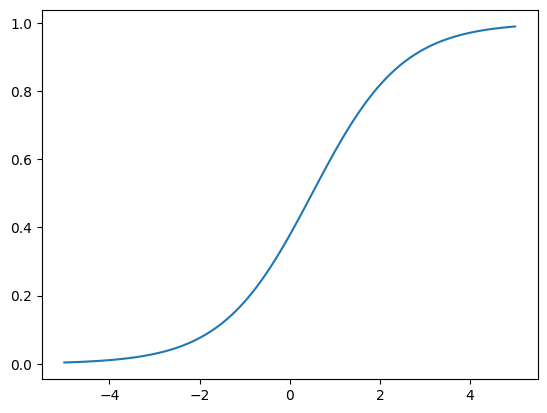

In [ ]:
#plot of activation function

def sigma(x):
    if type(x)==float:
        y = 1/(1+np.exp(0.5-x))
        return y
    elif type(x)==np.float64:
        y = 1/(1+np.exp(0.5-x))
        return y
    elif np.ndim(x)>=2:
        y = np.zeros(x.shape)
        [n,m] = x.shape
        for i in range(0,n):
          for j in range(0,m):
            y[i,j] = 1/(1+np.exp(0.5-x[i,j]))
        return y
    else:
        y = np.zeros(len(x))
        y[:] = 1/(1+np.exp(0.5-x[:]))
        return y
def sigmaprime(x):
    if type(x)==float:
        y = sigma(x) * (1-sigma(x))
        return y
    elif type(x)==np.float64:
        y = sigma(x) * (1-sigma(x))
        return y
    elif np.ndim(x)>=2:
        y = np.zeros(x.shape)
        [n,m] = x.shape
        for i in range(0,n):
          for j in range(0,m):
            y[i,j] = 1/(1+np.exp(0.5-x[i,j]))
        return y
    else:
        y = np.zeros(len(x))
        y[:] = sigma(x[:]) * (1-sigma(x[:]))
        return y
x = np.linspace(-5,5,100)
y = sigma(x)
plt.figure()
plt.plot(x,y)
plt.show()

In [ ]:
def nonlinear(Amat, type = "sigmoid"):
  Amat = np.array(Amat)
  match type:
    case "sigmoid":
      output = 1/(1 + np.exp(-Amat))
    case "relu":
      output = np.maximum(0, Amat)
    case "tanh":
      output = np.tanh(Amat)
    case "softmax":
      expAmat = np.exp(Amat)
      output = expAmat/(np.tile(np.sum(expAmat),[np.shape(expAmat)[0],1]))
    case "softsign":
      output = Amat/(1 + np.abs(Amat))
  return output

In [ ]:
def covlgrid(image, gridsize, stepsize, bias, filter):
  #[n,m] = np.shape(image)
  [trainsize,n,m] = np.shape(image)
  ksize = (n - gridsize + 2*bias)/stepsize + 1
  Xmat = np.zeros([trainsize,int(ksize),int(ksize)])
  for k in range(0,trainsize):
    Amat = np.zeros([n+2*bias,m+2*bias])
    Amat[bias:n+bias,bias:m+bias] = image[k]
    #ksize = (n - gridsize + 2*bias)/stepsize + 1
    #Xmat = np.zeros([int(ksize),int(ksize)])
    for i in range(0,int(ksize)):
      for j in range(0,int(ksize)):
        gridmat = Amat[i*stepsize:i*stepsize+gridsize,j*stepsize:j*stepsize+gridsize]
        Xmat[k,i,j] = np.sum(filter * gridmat)
  print(np.shape(Xmat))
  return Xmat

In [ ]:
def poolgrid(image, poolsize, stepsize, type="max"):
  #[n,m] = np.shape(image)
  [trainsize,n,m] = np.shape(image)
  ksize = (n - poolsize)/stepsize + 1
  Xmat = np.zeros([trainsize,int(ksize),int(ksize)])
  for k in range(0,trainsize):
    Amat = image[k]
    #ksize = (n - poolsize)/stepsize + 1
    #Xmat = np.zeros([int(ksize),int(ksize)])
    for i in range(0,int(ksize)):
      for j in range(0,int(ksize)):
        gridmat = Amat[i*stepsize:i*stepsize+poolsize,j*stepsize:j*stepsize+poolsize]
        match type:
          case "max":
            Xmat[k,i,j] = np.max(gridmat)
          case "average":
            Xmat[k,i,j] = np.average(gridmat)
          case "sum":
            Xmat[k,i,j] = np.sum(gridmat)
  print(np.shape(Xmat))
  return Xmat

(1, 14, 14)
(1, 13, 13)
(1, 6, 6)
(1, 5, 5)


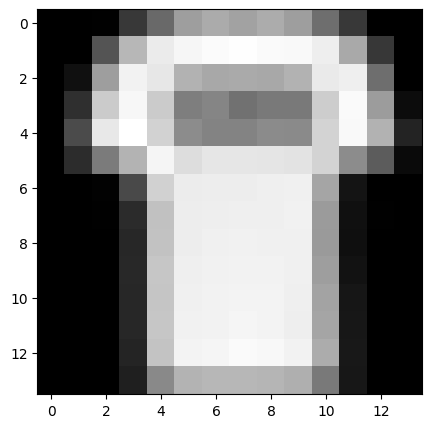

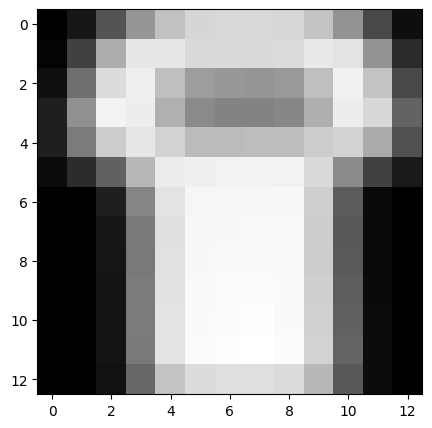

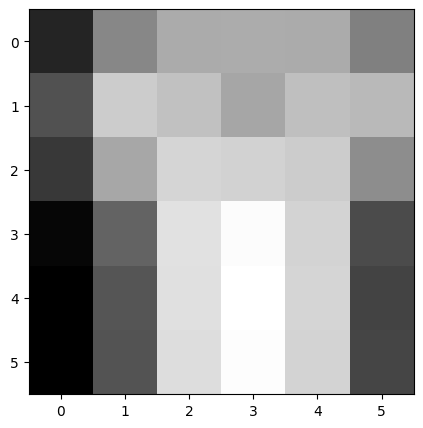

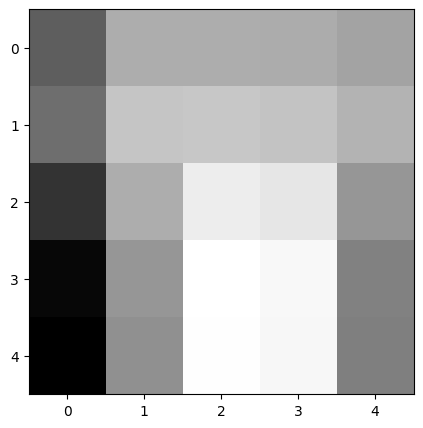

In [ ]:
filter = np.array([[0,1,1,0],[1,1,1,1],[1,1,1,1],[0,1,1,0]])
#filter = np.array([[-1,1,1,-1],[0,1,1,0],[0,1,1,0],[-1,1,1,-1]])
Xmat = covlgrid(X1,4,2,1,filter)
Xmat = nonlinear(Xmat, "relu")
plt.figure(figsize=(6, 5))
plt.imshow(Xmat[0], cmap="gray")
Xmat = poolgrid(Xmat,2,1,"average")
plt.figure(figsize=(6, 5))
plt.imshow(Xmat[0], cmap="gray")
Xmat = covlgrid(Xmat,4,2,1,filter)
Xmat = nonlinear(Xmat, "relu")
plt.figure(figsize=(6, 5))
plt.imshow(Xmat[0], cmap="gray")
Xmat = poolgrid(Xmat,2,1,"average")
plt.figure(figsize=(6, 5))
plt.imshow(Xmat[0], cmap="gray")

In [ ]:
print(Xmat)

[[[0.00082249 0.00124676 0.00124479 0.00124242 0.00119857]
  [0.00090934 0.00137385 0.00138305 0.00136605 0.00127897]
  [0.000595   0.00124711 0.00158922 0.00155299 0.00112464]
  [0.00035534 0.00112519 0.0016882  0.00164722 0.00101299]
  [0.0003176  0.00109147 0.00168188 0.0016452  0.00100046]]]


In [ ]:
def fullcon(image, Wmat, bvec):
  [trainsize,n,m] = np.shape(image)
  yvec = np.zeros([trainsize*10,1])
  for k in range(0,trainsize):
    Amat = image[k]
    avec = Amat.reshape(n*m,1)
    yvec[k*10:(k+1)*10] = Wmat @ avec + bvec
  return yvec

def softmax(yvec):
  trainsize = int(len(yvec)/10)
  yvecnew = np.zeros([len(yvec),1])
  for k in range(0,trainsize):
    yveck = yvec[k*10:(k+1)*10]
    yveck = yveck - np.max(yveck)
    for i in range(0,len(yveck)):
      yvecnew[k*10+i] = np.exp(yveck[i])/np.sum(np.exp(yveck))
  return yvecnew

def loss(yvec):
  trainsize = int(len(yvec)/10)
  element = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]])
  error = 0
  for k in range(0,trainsize):
    yveck = yvec[k*10:(k+1)*10]
    actveck = element == train_y[k]
    error = error + np.sum((softmax(yveck)-actveck)**2)/2
    error = error / trainsize
  return error

In [ ]:
Wmat = np.random.rand(10,Xmat.shape[1]*Xmat.shape[2])
bvec = np.random.rand(10,1)
print(Wmat)
print(bvec)


[[0.57754386 0.76597122 0.72878298 0.86502225 0.92999236 0.81913136
  0.54859706 0.99286301 0.50277804 0.07371573 0.95025221 0.21119038
  0.4345579  0.01652278 0.9128229  0.87534467 0.02663196 0.4185802
  0.87711757 0.79151987 0.88359857 0.79558062 0.92009491 0.66311189
  0.26195135]
 [0.49578032 0.34891952 0.62901734 0.22760143 0.72785437 0.07772854
  0.90603211 0.77208347 0.96126826 0.79056573 0.82835316 0.05882593
  0.4164038  0.78789932 0.80958278 0.76662722 0.37455209 0.23713949
  0.38989705 0.48261723 0.36134185 0.21271258 0.55593781 0.62421536
  0.1419591 ]
 [0.87330074 0.20061723 0.03441864 0.55746432 0.68929331 0.84425461
  0.68180344 0.30817475 0.14920284 0.89875083 0.89084066 0.62381463
  0.23679643 0.86047681 0.18946721 0.62186654 0.82034975 0.14638463
  0.90370296 0.21292698 0.37657708 0.89808704 0.2295691  0.5917281
  0.51838683]
 [0.28857067 0.55951338 0.21964474 0.04141281 0.22379779 0.8060671
  0.73894634 0.13602178 0.86419959 0.52003363 0.39422142 0.96838332
  0.59359

In [ ]:
yvec = fullcon(Xmat, Wmat, bvec)
print(softmax(yvec))
error = loss(yvec)
print(error)

[[0.08778932]
 [0.12570852]
 [0.15279051]
 [0.13096186]
 [0.0764641 ]
 [0.09278301]
 [0.06446523]
 [0.10736837]
 [0.06832134]
 [0.09334775]]
0.46041541789467


In [ ]:
import random

def graddes(filter, Wmat, bvec, image, randomsize, gamma = 0.1, maxiter = 5000):
  element = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]])
  trainsize = image.shape[0]
  [n,m] = Wmat.shape
  gdWmat = np.zeros(Wmat.shape)
  gdbvec = np.zeros(bvec.shape)
  randnum = random.sample(range(0,trainsize), randomsize)
  imagerand = image[randnum]
  yvec = fullcon(imagerand, Wmat, bvec)
  error = loss(yvec)
  #print("error",error)
  stp = 0
  while error > 0.001:
    randnum = random.sample(range(0,trainsize), randomsize)
    imagerand = image[randnum]
    actvalrand = train_y[randnum]
    for k in range(0,randomsize):
      Amat = imagerand[k]
      avec = Amat.reshape(Amat.shape[0]*Amat.shape[1],1)
      yvect = Wmat @ avec + bvec
      yvect = yvect - np.max(yvect)
      yvectsm = softmax(yvect)
      #print("softval",yvectsm)
      actvalk = element == actvalrand[k]
      actveck = actvalk.reshape([10,1])
      #print("actvalue",actveck)
      for i in range(0,n):
        gdbvec[i] = (np.sum(np.exp(yvect)) - np.exp(yvect[i])) * np.exp(yvect[i]) * (yvectsm[i]-actveck[i]) / (np.sum(np.exp(yvect)))**2
        #print((np.sum(np.exp(yvect)))**2)
        for j in range(0,m):
          gdWmat[i,j] = avec[j] * np.exp(yvect[i]) * ((np.sum(np.exp(yvect))) * (yvectsm[i]-actveck[i]) - (yvectsm-actveck).T @ np.exp(yvect)) / (np.sum(np.exp(yvect)))**2
      #print("yvec",yvect)
      #print("gdW",gdWmat)
      #print("gdb",gdbvec)
      Wmat = Wmat - gamma*gdWmat
      bvec = bvec - gamma*gdbvec
    yvec = fullcon(imagerand, Wmat, bvec)
    error = loss(yvec)
    print(error)
    stp = stp + 1
    if stp >= maxiter:
      break
  return error, Wmat, bvec

In [ ]:
err, W, b = graddes(filter, Wmat, bvec, Xmat, 1, 0.1)

<ipython-input-35-6b917350f705>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gdWmat[i,j] = avec[j] * np.exp(yvect[i]) * ((np.sum(np.exp(yvect))) * (yvectsm[i]-actveck[i]) - (yvectsm-actveck).T @ np.exp(yvect)) / (np.sum(np.exp(yvect)))**2


0.4596434310541022
0.45886276109039803
0.45807328171043915
0.45727486487938784
0.45646738081196353
0.45565069796479934
0.45482468302996076
0.4539892009297118
0.45314411481261835
0.45228928605108293
0.4514245742404107
0.45054983719950875
0.44966493097333
0.44876970983717235
0.4478640263029552
0.4469477311275951
0.4460206733236132
0.4450827001721085
0.4441336572382381
0.44317338838935494
0.44220173581595434
0.4412185400555895
0.4402236400199248
0.4392168730250974
0.43819807482556783
0.43716707965164764
0.436123720250893
0.43506782793356924
0.4339992326223889
0.4329177629067398
0.43182324610162054
0.4307155083115137
0.42959437449942733
0.42845966856134715
0.42731121340634354
0.4261488310425889
0.4249723426695401
0.42378156877655265
0.4225763292481944
0.42135644347653145
0.42012173048066587
0.4188720090338052
0.4176070977981483
0.41632681546787353
0.41503098092051854
0.4137194133770368
0.4123919325708227
0.4110483589259857
0.40968851374516174
0.40831221940713613
0.406919299574552
0.4055095

In [ ]:
def fcback(image, Wmat, bmat):
  image
  return Xmat